# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

I would like to investigate commute time to work in California in an attempt to understand how current housing and transit options impact 
people's daily commutes and in turn how these commutes impact the environment. Some potential questions to answer include: where are people
working? Where are people living? How has this changed over the years? How has this impacted the environment through emissions?

Datasets include: IPUMS - travel time to work and means of transportation to work variables - use API to access data
                  California Greenhouse Gas Emissions Inventory Data

In [19]:
import pandas as pd
file_path = "/Users/selmaosman/Downloads/05._Spring_2024_Semester/CP_255/UCB_CYPLAN255_2024/assignments/assignment_4/ghg_inventory_by_sector_all_00-21.xlsx"
sheet_name = "Included emissions"
ghg = pd.read_excel(file_path, sheet_name=sheet_name, header=1)
ghg.head()

,Type of emission,IPCC Code,Sector Level 1,Sector Level 2,Sector Level 3,Sector Level 4,Activity Level 1,Activity Level 2,GHG,GWP,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,SectorActivity_code
0,Included Emissions,1A4c,Agriculture & Forestry,Ag Energy Use,Crop Production,None,Fuel combustion,Natural gas,CH4,25,...,0.000214,0.000216,0.000220,0.000229,0.000210,0.000226,0.000216,0.000225,0.000259,60-01-10-99-01-020
1,Included Emissions,1A4c,Agriculture & Forestry,Ag Energy Use,Crop Production,None,Fuel combustion,Natural gas,CO2,1,...,0.454011,0.457506,0.465581,0.484604,0.444625,0.478480,0.458452,0.476639,0.549461,60-01-10-99-01-020
2,Included Emissions,1A4c,Agriculture & Forestry,Ag Energy Use,Crop Production,None,Fuel combustion,Natural gas,N2O,298,...,0.000255,0.000257,0.000262,0.000272,0.000250,0.000269,0.000258,0.000268,0.000309,60-01-10-99-01-020
3,Included Emissions,1A4c,Agriculture & Forestry,Ag Energy Use,Livestock,None,Fuel combustion,Natural gas,CH4,25,...,0.000034,0.000035,0.000037,0.000036,0.000037,0.000037,0.000036,0.000042,0.000044,60-01-27-99-01-020
4,Included Emissions,1A4c,Agriculture & Forestry,Ag Energy Use,Livestock,None,Fuel combustion,Natural gas,CO2,1,...,0.071798,0.073214,0.078055,0.075517,0.077693,0.079159,0.075328,0.089504,0.092532,60-01-27-99-01-020


In [20]:
ghg_included = ghg[ghg.iloc[:, 0] == "Included Emissions"]
ghg_transport = ghg_included[ghg_included.iloc[:, 2] == "Transportation"]
ghg_transport.head()

,Type of emission,IPCC Code,Sector Level 1,Sector Level 2,Sector Level 3,Sector Level 4,Activity Level 1,Activity Level 2,GHG,GWP,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,SectorActivity_code
1282,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Alternative Jet Fuel,CH4,25,...,NaN,NaN,NaN,NaN,NaN,NaN,3.194055e-07,9.267252e-07,0.000002,20-04-12-37-01-029
1283,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Alternative Jet Fuel,N2O,298,...,NaN,NaN,NaN,NaN,NaN,NaN,1.508558e-05,4.376941e-05,0.000081,20-04-12-37-01-029
1284,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Jet fuel,CH4,25,...,0.000663,0.000654,0.000707,0.000767,0.000812,0.000820,7.650615e-04,5.074916e-04,0.000619,20-04-12-37-01-035
1285,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Jet fuel,CO2,1,...,3.615064,3.566189,3.853748,4.181918,4.423262,4.470202,4.170018e+00,2.766116e+00,3.376537,20-04-12-37-01-035
1286,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Jet fuel,N2O,298,...,0.031325,0.030902,0.033393,0.036237,0.038328,0.038735,3.613400e-02,2.396892e-02,0.029258,20-04-12-37-01-035


In [21]:
cleaned_ghg_transport = ghg_transport[ghg_transport.iloc[:, 3] != "Not Specified"]
cleaned_ghg_transport = cleaned_ghg_transport[cleaned_ghg_transport.iloc[:, 4] != "Not Specified"]
cleaned_ghg_transport = cleaned_ghg_transport[cleaned_ghg_transport.iloc[:, 5] != "None"]
cleaned_ghg_transport.head()

,Type of emission,IPCC Code,Sector Level 1,Sector Level 2,Sector Level 3,Sector Level 4,Activity Level 1,Activity Level 2,GHG,GWP,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,SectorActivity_code
1282,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Alternative Jet Fuel,CH4,25,...,NaN,NaN,NaN,NaN,NaN,NaN,3.194055e-07,9.267252e-07,0.000002,20-04-12-37-01-029
1283,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Alternative Jet Fuel,N2O,298,...,NaN,NaN,NaN,NaN,NaN,NaN,1.508558e-05,4.376941e-05,0.000081,20-04-12-37-01-029
1284,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Jet fuel,CH4,25,...,0.000663,0.000654,0.000707,0.000767,0.000812,0.000820,7.650615e-04,5.074916e-04,0.000619,20-04-12-37-01-035
1285,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Jet fuel,CO2,1,...,3.615064,3.566189,3.853748,4.181918,4.423262,4.470202,4.170018e+00,2.766116e+00,3.376537,20-04-12-37-01-035
1286,Included Emissions,1A3aii,Transportation,Aviation,Domestic Air transport,Intrastate,Fuel combustion,Jet fuel,N2O,298,...,0.031325,0.030902,0.033393,0.036237,0.038328,0.038735,3.613400e-02,2.396892e-02,0.029258,20-04-12-37-01-035


In [23]:
low_ghg_transport = cleaned_ghg_transport['2021'].dropna().quantile(.01)
print(low_ghg_transport)
high_ghg_transport = cleaned_ghg_transport['2021'].dropna().quantile(.99)
print(high_ghg_transport)

1.669968756595863e-06
47.758391459543574


In [24]:
cleaned_ghg_transport = cleaned_ghg_transport[(cleaned_ghg_transport['2021'] < high_ghg_transport) & (cleaned_ghg_transport['2021'] > low_ghg_transport)].copy()
cleaned_ghg_transport.describe()

,GWP,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,93.000000,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,...,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.000000,91.000000,9.300000e+01,9.300000e+01,93.000000
mean,131.903226,1.470791e+00,1.449214e+00,1.487570e+00,1.431505e+00,1.436744e+00,1.428360e+00,1.422143e+00,1.426284e+00,1.332354e+00,...,1.071849e+00,1.082653e+00,1.085609e+00,1.112130e+00,1.162685e+00,1.147095,1.124650,1.066064e+00,9.021911e-01,0.950189
std,139.082323,7.902058e+00,7.786609e+00,7.994550e+00,7.563812e+00,7.512563e+00,7.441423e+00,7.390861e+00,7.393789e+00,6.956088e+00,...,6.063305e+00,6.108727e+00,6.142041e+00,6.357423e+00,6.668759e+00,6.483044,6.347617,6.116094e+00,5.073823e+00,5.420863
min,1.000000,3.533846e-08,3.693930e-08,5.320533e-08,1.056004e-08,1.422863e-08,2.045107e-08,1.329499e-07,1.060633e-07,6.554797e-08,...,3.598511e-08,3.088174e-07,3.379971e-07,6.073541e-07,9.496343e-07,0.000001,0.000001,3.194055e-07,9.267252e-07,0.000002
25%,25.000000,1.805177e-05,1.900530e-05,2.028116e-05,3.187002e-05,3.169137e-05,2.999286e-05,5.978981e-05,5.673603e-05,5.275569e-05,...,3.820753e-05,8.773576e-05,9.049304e-05,1.098459e-04,1.278344e-04,0.000132,0.000136,1.316342e-04,1.341435e-04,0.000135
50%,25.000000,1.368155e-03,1.623000e-03,1.717289e-03,2.311934e-03,2.112661e-03,2.144728e-03,2.148467e-03,2.153279e-03,2.165937e-03,...,7.841751e-04,9.936937e-04,8.735653e-04,1.052485e-03,1.292949e-03,0.001358,0.001423,1.230034e-03,1.271094e-03,0.001567
75%,298.000000,3.882621e-02,3.834111e-02,3.881791e-02,6.161390e-02,6.261982e-02,5.740331e-02,5.595011e-02,5.421427e-02,5.254703e-02,...,1.096758e-01,1.050669e-01,1.026888e-01,9.914075e-02,9.625343e-02,0.098210,0.091786,8.250373e-02,6.902040e-02,0.066789
max,298.000000,6.530375e+01,6.419466e+01,6.584556e+01,6.172164e+01,6.045164e+01,5.920925e+01,5.856335e+01,5.815088e+01,5.508846e+01,...,5.199961e+01,5.237714e+01,5.260479e+01,5.511094e+01,5.799319e+01,55.688148,54.647560,5.376485e+01,4.312853e+01,47.401677


In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<Axes: title={'center': 'Avg. GHG Emissions by Sector'}, xlabel='Sector', ylabel='GHG Emissions'>

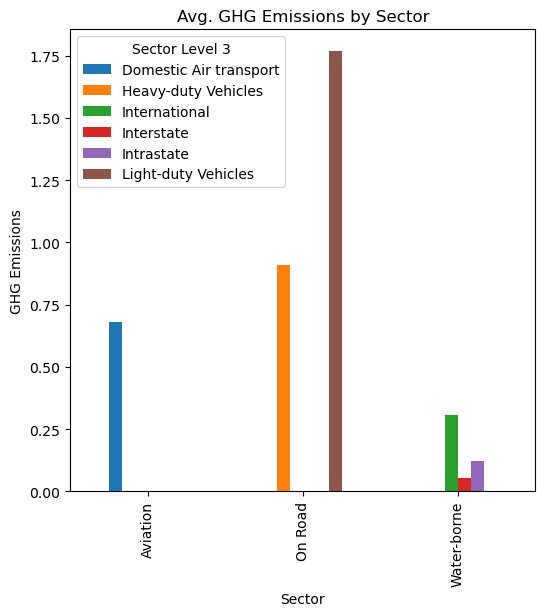

In [31]:
cleaned_ghg_transport.groupby(['Sector Level 2', 'Sector Level 3'])['2021'].mean().unstack().plot(
    kind='bar', figsize=(6,6), title='Avg. GHG Emissions by Sector', ylabel='GHG Emissions', xlabel='Sector')

In analyzing average GHG emissions by sector, we find that the 'On Road' sector produces the most emissions on average. Furthermore, within 
the On Road sector, Light-duty vehicles have the highest average emissions followed by Heavy-duty vehicles. The Aviation sector, composed of
Domestic Air transport, comes in second in terms of average emissions. Last is the water-borne sector, with international water-borne transit
producing the highest emissions within the sector, followed by intrastate water-borne transit and lastly interstate water-borne transit. 

In [4]:
import ipumspy
from pathlib import Path
from ipumspy import IpumsApiClient, UsaExtract, readers, ddi
IPUMS_API_KEY = '59cba10d8a5da536fc06b59d36546a59ae7d4f7cb91288d3d231ffcc'
DOWNLOAD_DIR = Path("/Users/selmaosman/Downloads/05._Spring_2024_Semester/CP_255/UCB_CYPLAN255_2024/assignments/assignment_4")
ipums = IpumsApiClient(IPUMS_API_KEY)

In [ ]:
extract = UsaExtract(
    ["us2021c"],
    ["STATEFIP", "TRANTIME"],
)
ipums.submit_extract(extract)
print(f"Extract submitted with id {extract.extract_id}")
ipums.wait_for_extract(extract)
ipums.download_extract(extract, download_dir=DOWNLOAD_DIR)
ddi_file = list(DOWNLOAD_DIR.glob("*.xml"))[0]
ddi = readers.read_ipums_ddi(ddi_file)
ipums_df = readers.read_microdata(ddi, DOWNLOAD_DIR / ddi.file_description.filename)

In [ ]:
extract_status = ipums.extract_status(extract=[8], collection=['usa'])
print(f"extract {8} is {extract_status}")

In [ ]:
ipums.download_extract(extract=[8], collection=['usa'])

In [113]:
csv_file_path = '/Users/selmaosman/Downloads/05._Spring_2024_Semester/CP_255/UCB_CYPLAN255_2024/assignments/assignment_4/ipums_traveltime.csv'
ipums_df = pd.read_csv(csv_file_path, header=155, nrows=147)
ipums_df.tail()

,Unnamed: 0,Unnamed: 1,1980 1980,1990 1990,2000 2000,2001 2001,2002 2002,2003 2003,2004 2004,2005 2005,...,2014 2014,2015 2015,2016 2016,2017 2017,2018 2018,2019 2019,2020 2020,2021 2021,2022 2022,ROW TOTAL
142,Weighted N,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78769.0
143,Weighted N,180,0.0,0.0,0.0,15069.0,18997.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34066.0
144,Weighted N,190,0.0,0.0,0.0,188.0,613.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,801.0
145,Weighted N,195,0.0,0.0,0.0,0.0,424.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.0
146,Weighted N,200,0.0,0.0,0.0,28669.0,29460.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58129.0


In [114]:
new_column_names = {
    "Unnamed: 1": "travel_time"
}
ipums_df = ipums_df.rename(columns=new_column_names)
ipums_df.head()

,Unnamed: 0,travel_time,1980 1980,1990 1990,2000 2000,2001 2001,2002 2002,2003 2003,2004 2004,2005 2005,...,2014 2014,2015 2015,2016 2016,2017 2017,2018 2018,2019 2019,2020 2020,2021 2021,2022 2022,ROW TOTAL
0,Weighted N,0,18532800.0,16223051.0,19880089.0,19419890.0,19830671.0,20094655.0,20314664.0,20422824.0,...,22490887.0,22443010.0,22361913.0,22322982.0,22131536.0,21941301.0,25004624.0,25200413.0,23588633.0,536055554.0
1,Weighted N,1,36800.0,70473.0,64558.0,71039.0,84160.0,107098.0,75581.0,93106.0,...,63129.0,68364.0,65448.0,75816.0,75062.0,80650.0,92261.0,102016.0,105451.0,1936633.0
2,Weighted N,2,52000.0,119015.0,109704.0,110040.0,146530.0,131084.0,106093.0,121164.0,...,112234.0,95938.0,93830.0,95359.0,87770.0,88023.0,82616.0,92198.0,96536.0,2688400.0
3,Weighted N,3,59700.0,135603.0,110958.0,111588.0,120957.0,143288.0,119383.0,124244.0,...,108683.0,100953.0,101767.0,94114.0,82818.0,92342.0,82542.0,79544.0,90113.0,2672878.0
4,Weighted N,4,20700.0,47268.0,40094.0,47177.0,53671.0,49414.0,44890.0,55454.0,...,42440.0,38583.0,40913.0,45837.0,40764.0,37885.0,42492.0,32907.0,34803.0,1102548.0


In [115]:
ipums_df['2021 2021'] = pd.to_numeric(ipums_df['2021 2021'], errors='coerce')
low_travel_time = ipums_df['2021 2021'].dropna().quantile(.01)
print(low_travel_time)
high_travel_time = ipums_df['2021 2021'].dropna().quantile(.99)
print(high_travel_time)

0.0
2106512.5799999996


In [116]:
cleaned_ipums_df = ipums_df[(ipums_df['2021 2021'] < high_travel_time) & (ipums_df['2021 2021'] > low_travel_time)].copy()
cleaned_ipums_df.describe()

,travel_time,1980 1980,1990 1990,2000 2000,2001 2001,2002 2002,2003 2003,2004 2004,2005 2005,2006 2006,...,2014 2014,2015 2015,2016 2016,2017 2017,2018 2018,2019 2019,2020 2020,2021 2021,2022 2022,ROW TOTAL
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,53.260000,45220.000000,1.153806e+05,1.171843e+05,1.205883e+05,1.230881e+05,1.255623e+05,1.243867e+05,1.257856e+05,1.318161e+05,...,1.364488e+05,1.396323e+05,1.434771e+05,1.460676e+05,1.476963e+05,1.459291e+05,1.214390e+05,1.191804e+05,1.311792e+05,3.173952e+06
std,32.659436,150463.491327,3.675591e+05,3.685246e+05,3.821029e+05,3.855902e+05,3.864972e+05,3.871792e+05,3.907256e+05,4.146432e+05,...,4.219802e+05,4.311682e+05,4.270168e+05,4.327462e+05,4.335239e+05,4.323449e+05,3.620464e+05,3.618973e+05,3.915065e+05,9.788585e+06
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+01,0.000000e+00,9.300000e+02
25%,25.750000,0.000000,1.950000e+02,4.282500e+02,1.742500e+02,1.575000e+02,2.105000e+02,2.180000e+02,2.935000e+02,2.740000e+02,...,5.032500e+02,4.342500e+02,4.737500e+02,6.402500e+02,6.167500e+02,6.660000e+02,8.227500e+02,6.907500e+02,6.847500e+02,1.020500e+04
50%,51.500000,500.000000,1.592500e+03,2.728000e+03,1.947000e+03,1.659000e+03,2.292000e+03,1.615000e+03,2.050500e+03,1.954500e+03,...,2.885500e+03,2.831500e+03,3.303500e+03,3.978000e+03,3.527500e+03,4.341500e+03,3.979500e+03,3.987000e+03,4.461000e+03,7.373400e+04
75%,76.250000,8575.000000,2.482675e+04,3.286600e+04,2.463450e+04,2.644950e+04,3.181750e+04,2.442575e+04,2.648825e+04,2.823125e+04,...,2.738925e+04,3.026175e+04,3.833525e+04,4.376775e+04,4.203100e+04,3.892500e+04,4.090425e+04,3.482125e+04,3.821550e+04,8.528480e+05
max,141.000000,875500.000000,2.138500e+06,2.065668e+06,2.148668e+06,2.198909e+06,2.211720e+06,2.134577e+06,2.191593e+06,2.330499e+06,...,2.389839e+06,2.439140e+06,2.371257e+06,2.401025e+06,2.395514e+06,2.393560e+06,2.099942e+06,2.091405e+06,2.267612e+06,5.546641e+07


In [117]:
cleaned_ipums_df = cleaned_ipums_df[['travel_time', '2021 2021']]
cleaned_ipums_df.head()

,travel_time,2021 2021
1,1,102016.0
2,2,92198.0
3,3,79544.0
4,4,32907.0
5,5,752272.0


<Axes: title={'center': '2021 Travel Time'}, xlabel='Travel Time (minutes)', ylabel='Number of People'>

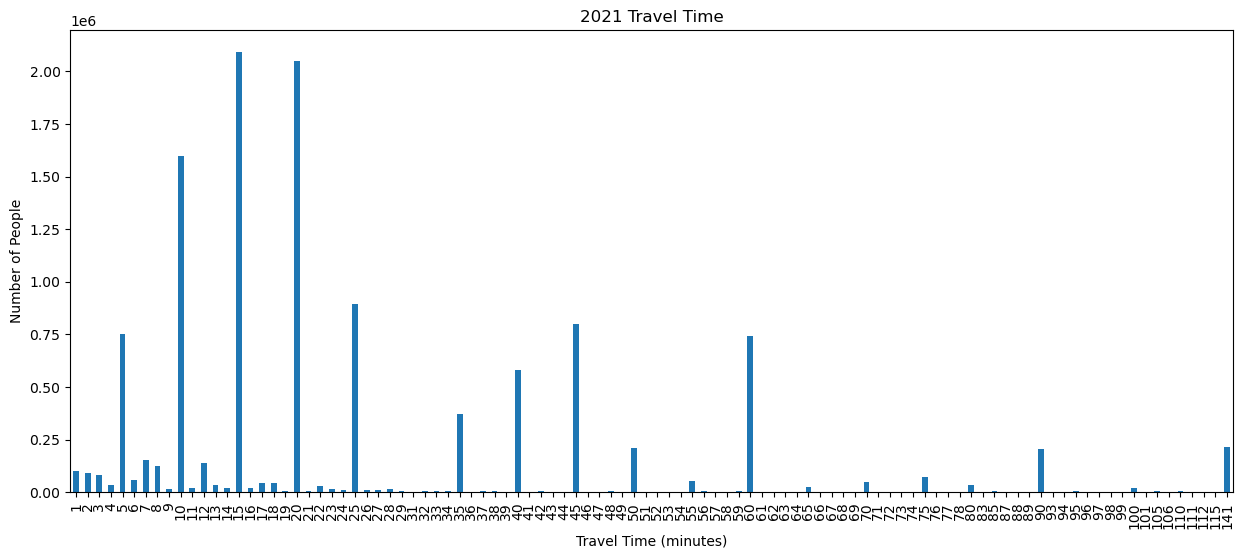

In [118]:
cleaned_ipums_df.set_index('travel_time', inplace=True)
cleaned_ipums_df['2021 2021'].plot(kind='bar', figsize=(15, 6), title='2021 Travel Time', xlabel='Travel Time (minutes)', ylabel='Number of People')

In the plot above, we can see that the majority of people in California in 2021 have travel times to work clustered between 5 and 60 minutes.
The shortest travel time is 1 minute and the longest travel time is 141 minutes. 

Using the two datasets introduces above, including the CA GHG Emissions Inventory, and the IPUMS Travel Time to Work data, I wish to examine if there is a correlation between travel time to work over the years and GHG emissions over the years. The GHG emissions inventory runs from 2000 to 2021, so I will therefore use this as the time period for the analysis. I will have to filter the GHG emissions inventory data to only include transportation types that are relevant for commuting, such as passenger cars and buses. I can download and use the Means of Transportation to Work variable from IPUMS to help decide which transportation types to include in the analysis. I will also have to convert the person weights produced in the IPUMS data and the travel time categories to produce an average travel time for each year. I will then run a statistical test to analyze whether there is a statistically significant correlation between the change in travel time and the change in GHG emissions between 2000 and 2021.

I hope to perform this analysis including a spatial dimension as well. I need to investigate whether the data can be downloaded with further spatial disaggegation. If possible, I hope to create a map visually showing the change in GHG emissions and the change in travel times to work at a spatially disaggregated scale, such as at the county scale. I can also download and use the place of work IPUMS variable to map out where people are commuting to relative to where they live. 

Ultimately, I hope that these analyses will help answer the question of how commute times impact the environemnt in terms of emissions. Furthermore, I hope to shed light on the current housing and transportation situation in California. For example, if places of residence are further away from places of work, impacting commute times, and in turn negatively impacting the enviornment due to increased emissions. Another example would be if people are using different types of transportation to work such as buses or other public transportation instead of passenger cars then the impact on the environment in terms of GHG emissions might be lessened. 